# About
You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

# Method 1
- **Importing Necessary Libraries**
- **Reading the Train Data**
- **Reading the Test Data**
- **EDA of Train Data**
- **Univariate Analysis of Train Data**
- **Bivariate Analysis of Train Data**
- **Multivariate Analysis**

## Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.read_csv("VariableDefinitions.csv")

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## Reading the Train Data:

In [3]:
Train = pd.read_csv("train.csv")
Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
Train['year'] = pd.to_datetime(Train['year'], format='%Y')+ pd.offsets.YearBegin(0)

In [5]:
Train.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018-01-01,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018-01-01,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


## Reading the Test Data:

In [6]:
Test = pd.read_csv("Test.csv")
Test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [7]:
Test['year'] = pd.to_datetime(Test['year'], format='%Y') + pd.offsets.YearBegin(0)
Test['year']

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
10081   2018-01-01
10082   2018-01-01
10083   2018-01-01
10084   2018-01-01
10085   2018-01-01
Name: year, Length: 10086, dtype: datetime64[ns]

In [8]:
Test.tail()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
10081,Uganda,2018-01-01,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018-01-01,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018-01-01,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018-01-01,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed
10085,Uganda,2018-01-01,uniqueid_3002,Urban,Yes,7,16,Male,Other relative,Single/Never Married,Secondary education,Other Income


## EDA on Train Data:

In [9]:
Train.shape

(23524, 13)

In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 23524 non-null  object        
 1   year                    23524 non-null  datetime64[ns]
 2   uniqueid                23524 non-null  object        
 3   bank_account            23524 non-null  object        
 4   location_type           23524 non-null  object        
 5   cellphone_access        23524 non-null  object        
 6   household_size          23524 non-null  int64         
 7   age_of_respondent       23524 non-null  int64         
 8   gender_of_respondent    23524 non-null  object        
 9   relationship_with_head  23524 non-null  object        
 10  marital_status          23524 non-null  object        
 11  education_level         23524 non-null  object        
 12  job_type                23524 non-null  object

In [11]:
for i in Train.columns:
    print("There are", Train[i].isnull().sum(),"Missing Values in the",i,"column")

There are 0 Missing Values in the country column
There are 0 Missing Values in the year column
There are 0 Missing Values in the uniqueid column
There are 0 Missing Values in the bank_account column
There are 0 Missing Values in the location_type column
There are 0 Missing Values in the cellphone_access column
There are 0 Missing Values in the household_size column
There are 0 Missing Values in the age_of_respondent column
There are 0 Missing Values in the gender_of_respondent column
There are 0 Missing Values in the relationship_with_head column
There are 0 Missing Values in the marital_status column
There are 0 Missing Values in the education_level column
There are 0 Missing Values in the job_type column


In [12]:
print("There are",Train.duplicated().sum(), "Duplicate Values in the Train Dataset.")

There are 0 Duplicate Values in the Train Dataset.


In [13]:
Train.drop(["uniqueid"], axis = 1, inplace=True)

In [14]:
print("Descriptive Statistics of the Train Data:")
Train.describe(include="all")

Descriptive Statistics of the Train Data:


,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016-12-22 20:19:04.703281920,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN
max,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,21.000000,100.000000,NaN,NaN,NaN,NaN,NaN


In [15]:
num = Train.select_dtypes(include = ["float64","int64"])
num.columns

Index(['household_size', 'age_of_respondent'], dtype='object')

In [16]:
cat = Train.select_dtypes(include="object")
cat.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [17]:
print("Unique values in the Train Data:\n")
for i in cat.columns:
    print("Unique values in the",i,"column\n", cat[i].unique(),"\n")

Unique values in the Train Data:

Unique values in the country column
 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

Unique values in the bank_account column
 ['Yes' 'No'] 

Unique values in the location_type column
 ['Rural' 'Urban'] 

Unique values in the cellphone_access column
 ['Yes' 'No'] 

Unique values in the gender_of_respondent column
 ['Female' 'Male'] 

Unique values in the relationship_with_head column
 ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] 

Unique values in the marital_status column
 ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] 

Unique values in the education_level column
 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA'] 

Unique values in the job_type column
 ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 '

In [18]:
print("Value Counts of Train Dataset:\n")
for i in cat.columns:
    print(i, "column has following Value counts", cat[i].value_counts(),"\n\n")

Value Counts of Train Dataset:

country column has following Value counts country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64 


bank_account column has following Value counts bank_account
No     20212
Yes     3312
Name: count, dtype: int64 


location_type column has following Value counts location_type
Rural    14343
Urban     9181
Name: count, dtype: int64 


cellphone_access column has following Value counts cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64 


gender_of_respondent column has following Value counts gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64 


relationship_with_head column has following Value counts relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64 


marital_status column has following Value 

## Outliers:

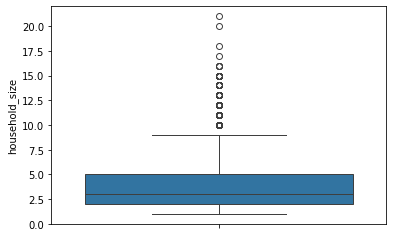

In [19]:
sns.boxplot(num["household_size"]);

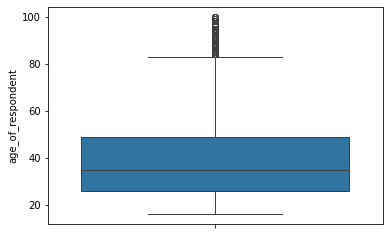

In [20]:
sns.boxplot(num["age_of_respondent"]);

In [21]:
print("Skewness of Numerical Variables:-\n",num.skew())

Skewness of Numerical Variables:-
 household_size       0.988200
age_of_respondent    0.841686
dtype: float64


**When a distribution has positive skewness, it means that the right tail of the distribution is longer than the left tail. This indicates that there are relatively more data points with lower values, and fewer data points with higher values. In terms of the variables:**

## Univariate Analysis

In [22]:
num.columns

Index(['household_size', 'age_of_respondent'], dtype='object')

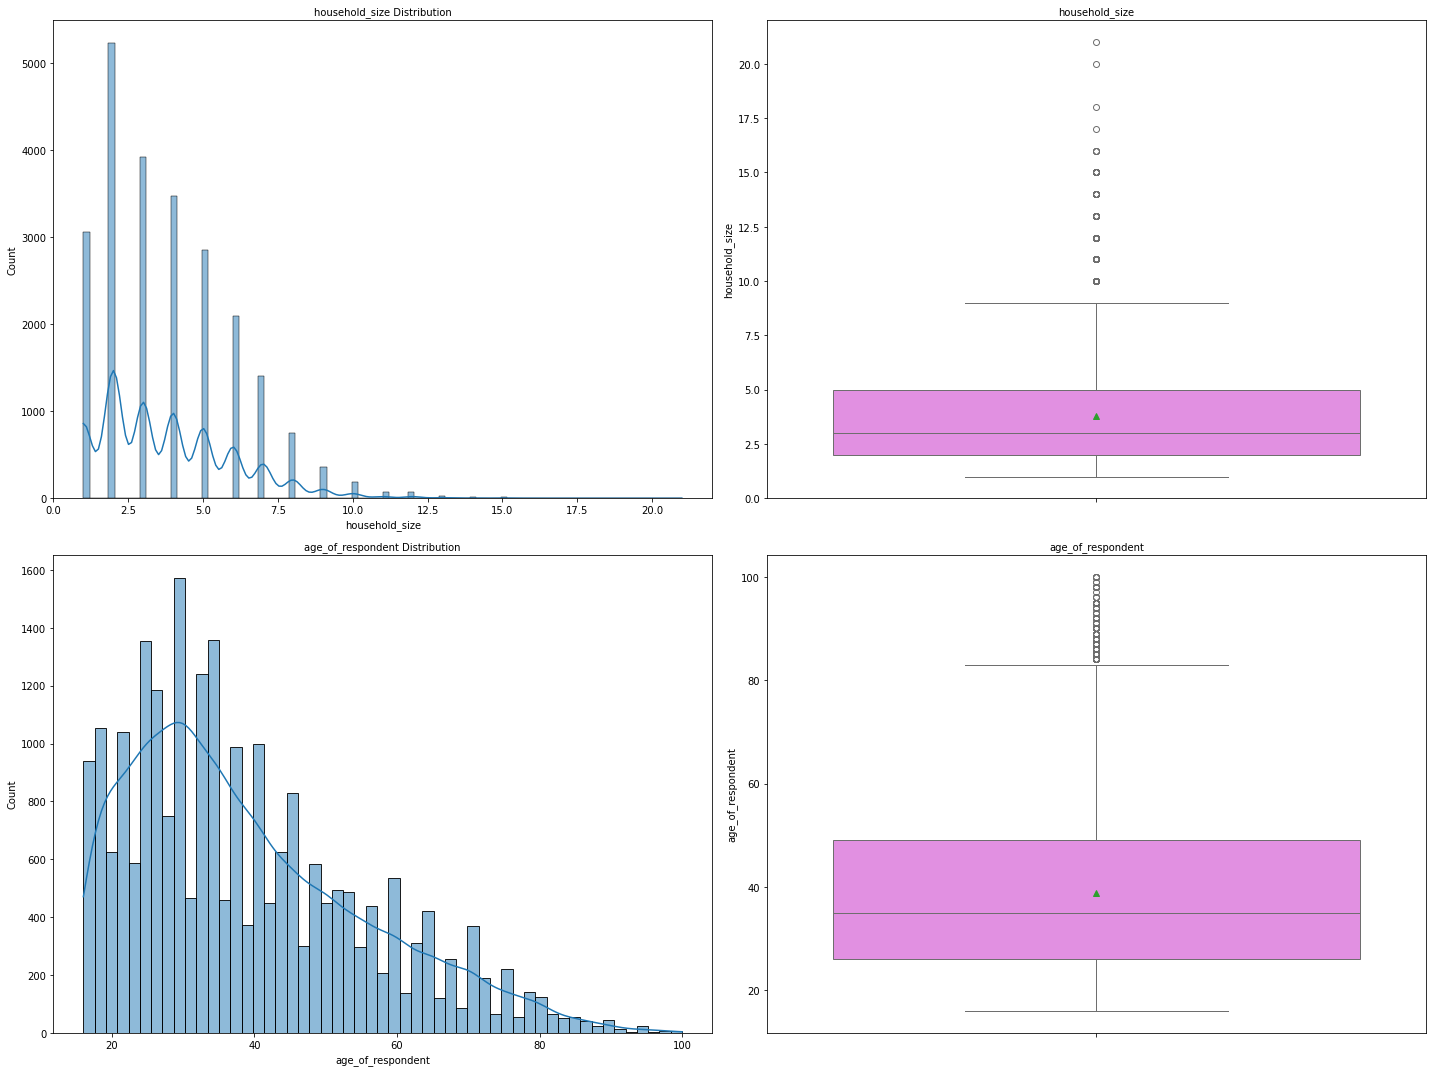

In [23]:
fig, axes= plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,15)

a = sns.histplot(num['household_size'],kde=True, ax=axes[0][0])
a.set_title("household_size Distribution", fontsize=10)

a= sns.boxplot(num["household_size"], orient="v", color="violet",showmeans=True, ax= axes[0][1])
a.set_title("household_size", fontsize=10)

a = sns.histplot(num["age_of_respondent"],kde=True, ax=axes[1][0])
a.set_title("age_of_respondent Distribution", fontsize=10)

a= sns.boxplot(num["age_of_respondent"], orient="v", color="violet",showmeans=True, ax= axes[1][1])
a.set_title("age_of_respondent", fontsize=10)
plt.tight_layout()
plt.show()

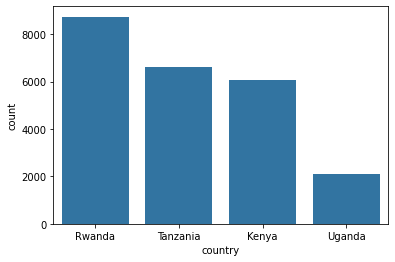

In [24]:
sns.countplot(x = cat["country"], order = cat["country"].value_counts().index);

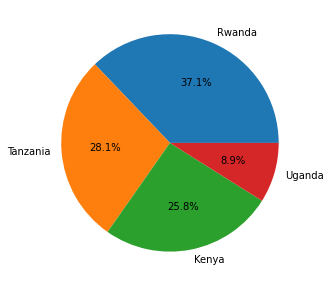

In [25]:
plt.figure(figsize=(5,5))
plt.pie(cat["country"].value_counts(),labels=cat["country"].value_counts().index,autopct='%1.1f%%');

- **Lowest No. of respondents are from Uganda and highest from Rwanda.**
- **There is a big differnce between highest and lowest.**

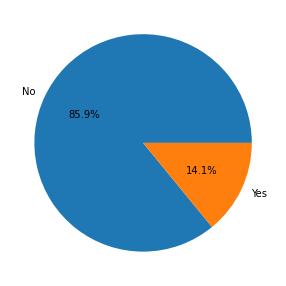

In [26]:
plt.figure(figsize=(5,5))
plt.pie(cat["bank_account"].value_counts(),labels=cat["bank_account"].value_counts().index,autopct='%1.1f%%');

- **85.9% of population do not have bank account. That is a big part of population.**

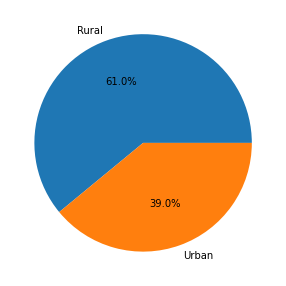

In [27]:
plt.figure(figsize=(5,5))
plt.pie(cat["location_type"].value_counts(),labels=cat["location_type"].value_counts().index,autopct='%1.1f%%');

- **A large part of population belongs to Rural Area.**

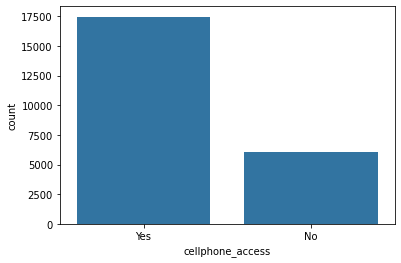

In [28]:
sns.countplot(x = cat["cellphone_access"]);

- **Approx 26% population do not have cellphone access.**

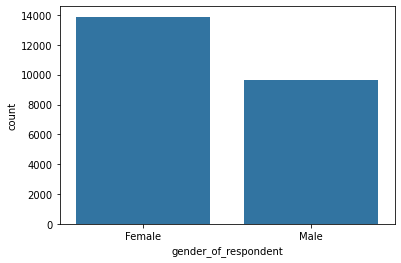

In [29]:
sns.countplot(x= cat["gender_of_respondent"]);

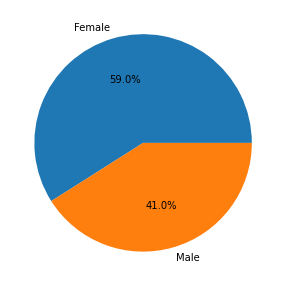

In [30]:
plt.figure(figsize=(5,5))
plt.pie(cat["gender_of_respondent"].value_counts(),labels=cat["gender_of_respondent"].value_counts().index,autopct='%1.1f%%');

- **Female population is more than male population.**

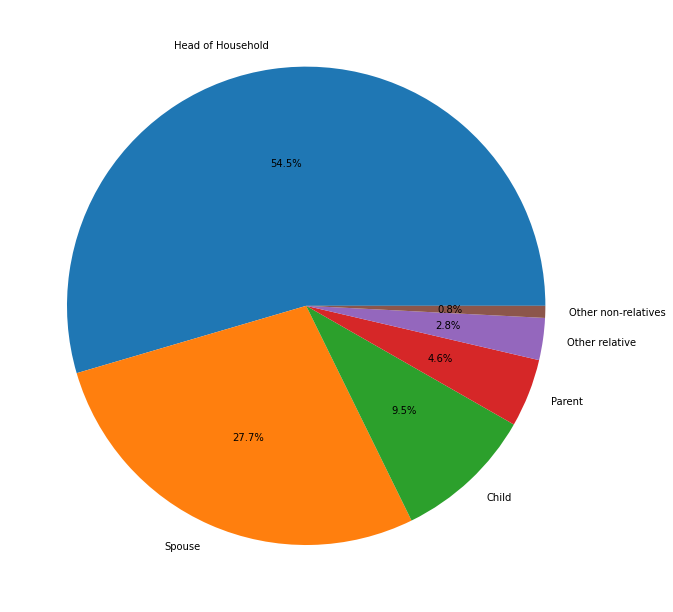

In [31]:
plt.figure(figsize=(11,11))
plt.pie(cat["relationship_with_head"].value_counts(),labels=cat["relationship_with_head"].value_counts().index,autopct='%1.1f%%');

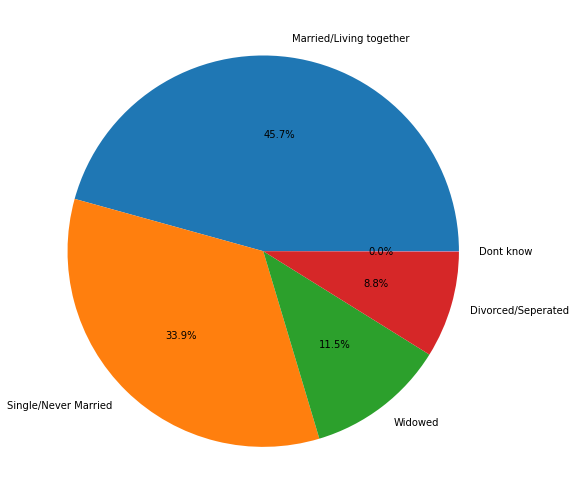

In [32]:
plt.figure(figsize=(9,9))
plt.pie(cat["marital_status"].value_counts(),labels=cat["marital_status"].value_counts().index,autopct='%1.1f%%');

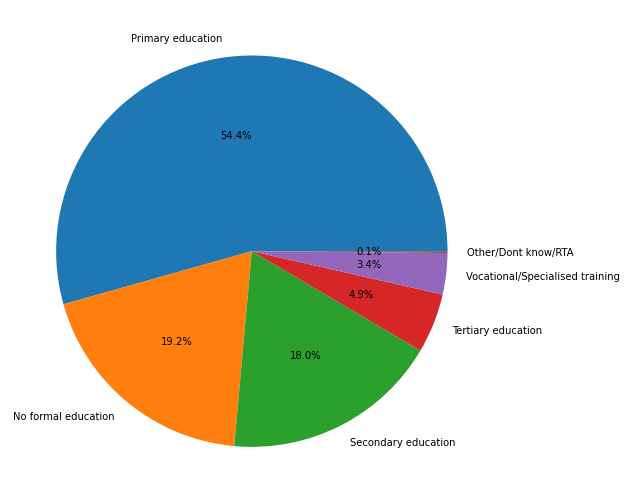

In [33]:
plt.figure(figsize=(9,9))
plt.pie(cat["education_level"].value_counts(),labels=cat["education_level"].value_counts().index,autopct='%1.1f%%');

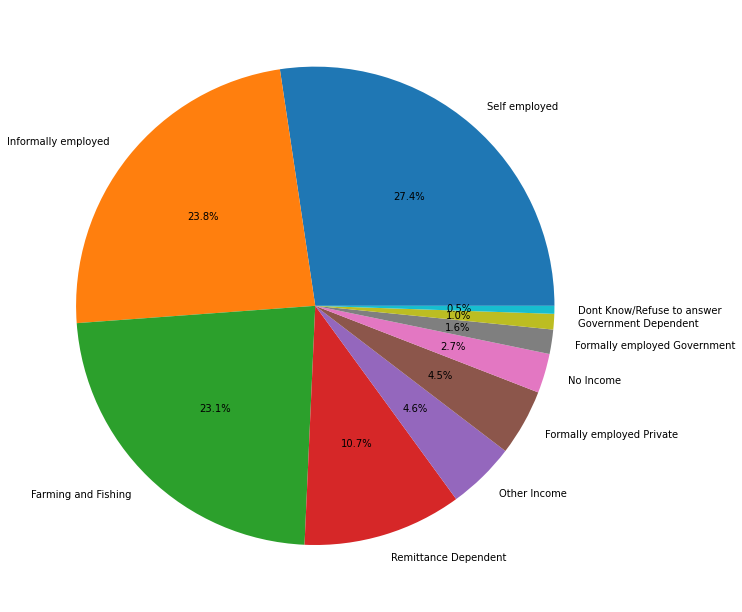

In [34]:
plt.figure(figsize=(11,11))
plt.pie(cat["job_type"].value_counts(),labels=cat["job_type"].value_counts().index,autopct='%1.1f%%');

## Bivariate Analysis:

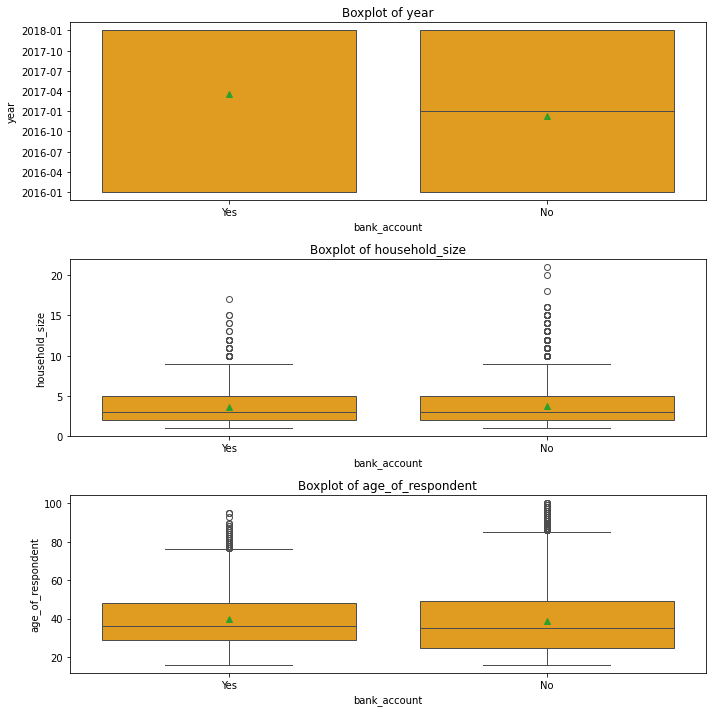

In [35]:
plt.figure(figsize = (10,10))
feature_list = Train.select_dtypes(exclude='object').columns
for i in range(len(feature_list)):
    #print(i)
    plt.subplot(3, 1, i + 1)
    sns.boxplot(y = feature_list[i], data = Train, x = 'bank_account', showmeans=True, color = "orange")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

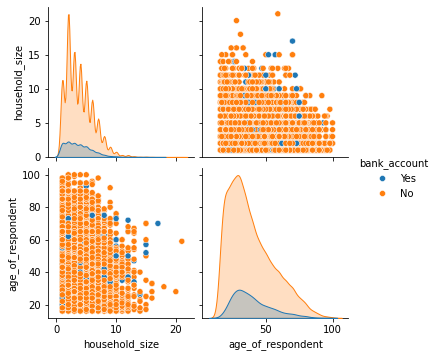

In [36]:
sns.pairplot(Train, hue ="bank_account");

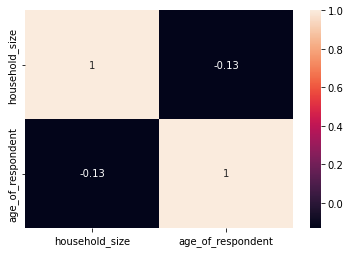

In [37]:
sns.heatmap(num.corr(), annot = True);

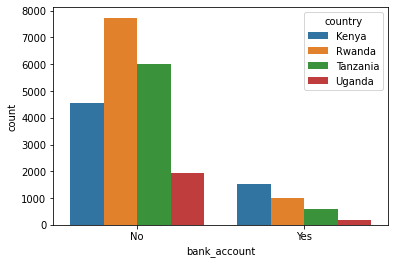

In [38]:
sns.countplot(x = cat["bank_account"],hue=  cat["country"], order = cat["bank_account"].value_counts().index);

Kenya has hieghest no. of account holders, whether Rwanda has the hieghest no. of population.

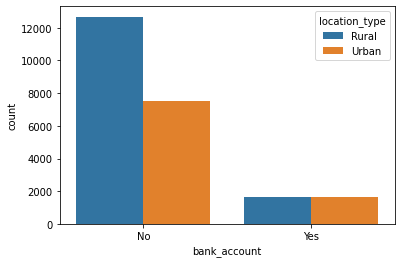

In [39]:
sns.countplot(x= cat["bank_account"], hue = cat["location_type"],order = cat["bank_account"].value_counts().index);

Rural bank account holders and uraban bank account holders are equal, whether Rural population is more than Urban Population.

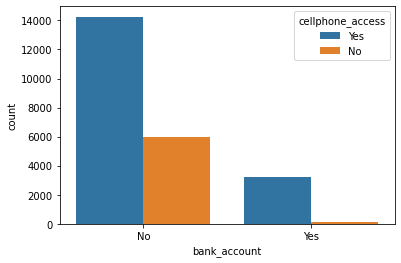

In [40]:
sns.countplot(x= cat["bank_account"], hue = cat["cellphone_access"], order = cat["bank_account"].value_counts().index);

People who have cellphone access most of people tend to have bank account.

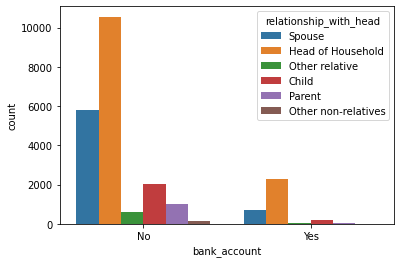

In [41]:
sns.countplot(x= cat["bank_account"], hue = cat["relationship_with_head"], order = cat["bank_account"].value_counts().index);

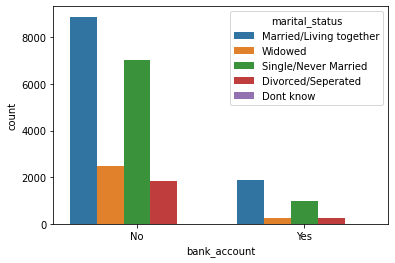

In [42]:
sns.countplot(x = cat["bank_account"],hue=  cat["marital_status"], order = cat["bank_account"].value_counts().index);

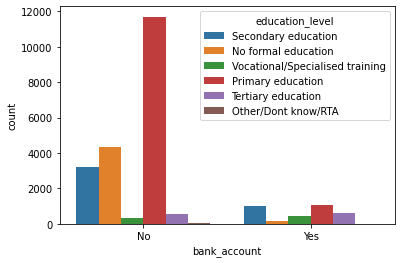

In [43]:
sns.countplot(x = cat["bank_account"],hue=  cat["education_level"], order = cat["bank_account"].value_counts().index);

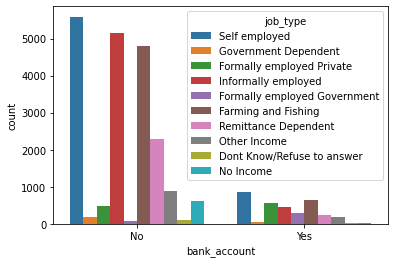

In [44]:
sns.countplot(x = cat["bank_account"],hue=  cat["job_type"], order = cat["bank_account"].value_counts().index);

Formally employed private and goverment who have bank account are more than who do not have bank account.

In [45]:
for i in num:
    Train[i] = (num[i])

In [46]:
for i in cat:
    Train[i] = (cat[i])

In [47]:
Train.describe(include = "all")

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016-12-22 20:19:04.703281920,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN
max,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,21.000000,100.000000,NaN,NaN,NaN,NaN,NaN


## Variable Transformation(Encoding):-

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

In [48]:
Train_new = Train.copy()

In [49]:
from sklearn.preprocessing import LabelEncoder
le_year=LabelEncoder()
le_country = LabelEncoder()
le_bank_account =LabelEncoder()
le_location_type =LabelEncoder()
le_cellphone_access =LabelEncoder()
le_gender_of_respondent =LabelEncoder()
le_relationship_with_head =LabelEncoder()
le_marital_status =LabelEncoder()
le_education_level =LabelEncoder()
le_job_type =LabelEncoder()

In [50]:
Train_new["year_n"]= le_year.fit_transform(Train_new["year"])
Train_new["country_n"]= le_country.fit_transform(Train_new["country"])
Train_new["bank_account_n"]= le_bank_account.fit_transform(Train_new["bank_account"])
Train_new["location_type_n"]= le_location_type.fit_transform(Train_new["location_type"])
Train_new["cellphone_access_n"]= le_cellphone_access.fit_transform(Train_new["cellphone_access"])
Train_new["gender_of_respondent_n"]= le_gender_of_respondent.fit_transform(Train_new["gender_of_respondent"])
Train_new["relationship_with_head_n"]= le_relationship_with_head.fit_transform(Train_new["relationship_with_head"])
Train_new["marital_status_n"]= le_marital_status.fit_transform(Train_new["marital_status"])
Train_new["education_level_n"]= le_education_level.fit_transform(Train_new["education_level"])
Train_new["job_type_n"]= le_job_type.fit_transform(Train_new["job_type"])

In [51]:
Train_new.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,...,year_n,country_n,bank_account_n,location_type_n,cellphone_access_n,gender_of_respondent_n,relationship_with_head_n,marital_status_n,education_level_n,job_type_n
0,Kenya,2018-01-01,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,...,2,0,1,0,1,0,5,2,3,9
1,Kenya,2018-01-01,No,Rural,No,5,70,Female,Head of Household,Widowed,...,2,0,0,0,0,0,1,4,0,4
2,Kenya,2018-01-01,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,...,2,0,1,1,1,1,3,3,5,9
3,Kenya,2018-01-01,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,...,2,0,0,0,1,0,1,2,2,3
4,Kenya,2018-01-01,No,Urban,No,8,26,Male,Child,Single/Never Married,...,2,0,0,1,0,1,0,3,2,5


In [52]:
cat.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [53]:
Train_new.drop(cat.columns, axis=1, inplace=True)

In [54]:
Train_new.drop(["year"], axis=1, inplace=True)

In [55]:
Train_new

,household_size,age_of_respondent,year_n,country_n,bank_account_n,location_type_n,cellphone_access_n,gender_of_respondent_n,relationship_with_head_n,marital_status_n,education_level_n,job_type_n
0,3,24,2,0,1,0,1,0,5,2,3,9
1,5,70,2,0,0,0,0,0,1,4,0,4
2,5,26,2,0,1,1,1,1,3,3,5,9
3,5,34,2,0,0,0,1,0,1,2,2,3
4,8,26,2,0,0,1,0,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,4,48,2,3,0,0,1,0,1,0,0,7
23520,2,27,2,3,0,0,1,0,1,3,3,7
23521,5,27,2,3,0,0,1,0,4,4,2,7
23522,7,30,2,3,0,1,1,0,4,0,3,9


In [56]:
Train

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018-01-01,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018-01-01,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [57]:
# Copy all the predictor variables into X dataframe
X = Train_new.drop('bank_account_n', axis=1)

# Copy target into the y dataframe.  
y = Train_new['bank_account_n']

In [58]:
X.head()

,household_size,age_of_respondent,year_n,country_n,location_type_n,cellphone_access_n,gender_of_respondent_n,relationship_with_head_n,marital_status_n,education_level_n,job_type_n
0,3,24,2,0,0,1,0,5,2,3,9
1,5,70,2,0,0,0,0,1,4,0,4
2,5,26,2,0,1,1,1,3,3,5,9
3,5,34,2,0,0,1,0,1,2,2,3
4,8,26,2,0,1,0,1,0,3,2,5


In [59]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account_n, dtype: int32

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X = scaler.fit_transform(X)
y = y.to_numpy()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20, random_state=123)

In [63]:
display(X_train)
display(y_train)
display(X_test)
display(y_test)

array([[ 0.53983446, -1.25937929, -1.15175136, ...,  0.60758282,
         0.00419714, -0.14044038],
       [-0.80692733, -1.13831551,  1.20854126, ..., -0.39296169,
         0.00419714,  0.83086094],
       [ 0.98875506,  0.5565774 , -1.15175136, ..., -0.39296169,
        -1.65519051, -1.43550882],
       ...,
       [-1.25584792,  1.1013644 ,  0.02839495, ...,  1.60812733,
         0.00419714, -0.7879746 ],
       [-0.80692733, -0.59352851,  0.02839495, ...,  0.60758282,
         0.00419714,  0.83086094],
       [ 0.09091386, -0.71459229,  0.02839495, ..., -2.39405071,
         0.83389097, -0.14044038]])

array([0, 0, 0, ..., 1, 0, 0])

array([[ 0.98875506,  1.88827897,  1.20854126, ..., -2.39405071,
        -1.65519051, -1.43550882],
       [ 0.53983446,  1.58561952, -1.15175136, ..., -0.39296169,
         0.00419714, -1.43550882],
       [ 0.09091386, -0.77512418,  0.02839495, ...,  0.60758282,
         0.00419714,  1.15462805],
       ...,
       [ 1.43767565, -0.23033717, -1.15175136, ..., -0.39296169,
         0.83389097, -0.14044038],
       [ 1.43767565, -0.29086906,  1.20854126, ..., -0.39296169,
         0.00419714,  1.15462805],
       [ 0.53983446,  1.1013644 , -1.15175136, ..., -0.39296169,
         0.00419714, -1.43550882]])

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
Test.shape

(10086, 12)

In [65]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 10086 non-null  object        
 1   year                    10086 non-null  datetime64[ns]
 2   uniqueid                10086 non-null  object        
 3   location_type           10086 non-null  object        
 4   cellphone_access        10086 non-null  object        
 5   household_size          10086 non-null  int64         
 6   age_of_respondent       10086 non-null  int64         
 7   gender_of_respondent    10086 non-null  object        
 8   relationship_with_head  10086 non-null  object        
 9   marital_status          10086 non-null  object        
 10  education_level         10086 non-null  object        
 11  job_type                10086 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memo

In [66]:
for i in Test.columns:
    print("There are", Test[i].isnull().sum(),"Missing Values in the",i,"column")

There are 0 Missing Values in the country column
There are 0 Missing Values in the year column
There are 0 Missing Values in the uniqueid column
There are 0 Missing Values in the location_type column
There are 0 Missing Values in the cellphone_access column
There are 0 Missing Values in the household_size column
There are 0 Missing Values in the age_of_respondent column
There are 0 Missing Values in the gender_of_respondent column
There are 0 Missing Values in the relationship_with_head column
There are 0 Missing Values in the marital_status column
There are 0 Missing Values in the education_level column
There are 0 Missing Values in the job_type column


In [67]:
print("There are",Train.duplicated().sum(), "Duplicate Values in the Train Dataset.")

There are 4429 Duplicate Values in the Train Dataset.


In [68]:
Data = Test.copy()

In [69]:
Test.drop(["uniqueid"], axis = 1, inplace=True)

In [70]:
Test.describe(include = "all")

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,10086,10086,10086,10086,10086.000000,10086.000000,10086,10086,10086,10086,10086
unique,4,NaN,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,3745,NaN,6189,7559,NaN,NaN,5847,5487,4663,5479,2773
mean,NaN,2016-12-22 20:02:08.494943488,NaN,NaN,3.778802,38.308348,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016-01-01 00:00:00,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017-01-01 00:00:00,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018-01-01 00:00:00,NaN,NaN,5.000000,48.000000,NaN,NaN,NaN,NaN,NaN
max,NaN,2018-01-01 00:00:00,NaN,NaN,20.000000,100.000000,NaN,NaN,NaN,NaN,NaN


In [71]:
num = Test.select_dtypes(include = ["float64","int64"])
num.columns

Index(['household_size', 'age_of_respondent'], dtype='object')

In [72]:
cat = Test.select_dtypes(include="object")
cat.columns

Index(['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [73]:
print("Unique values in the Test Data:\n")
for i in cat.columns:
    print("Unique values in the",i,"column\n", cat[i].unique(),"\n")

Unique values in the Test Data:

Unique values in the country column
 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

Unique values in the location_type column
 ['Urban' 'Rural'] 

Unique values in the cellphone_access column
 ['Yes' 'No'] 

Unique values in the gender_of_respondent column
 ['Male' 'Female'] 

Unique values in the relationship_with_head column
 ['Head of Household' 'Parent' 'Child' 'Spouse' 'Other relative'
 'Other non-relatives'] 

Unique values in the marital_status column
 ['Married/Living together' 'Single/Never Married' 'Divorced/Seperated'
 'Widowed' 'Dont know'] 

Unique values in the education_level column
 ['Secondary education' 'Vocational/Specialised training'
 'No formal education' 'Primary education' 'Other/Dont know/RTA'
 'Tertiary education'] 

Unique values in the job_type column
 ['Formally employed Government' 'Formally employed Private'
 'Remittance Dependent' 'Self employed' 'Informally employed'
 'Farming and Fishing' 'Government Dependent' 'Other Income'

In [74]:
print("Value Counts of Test Dataset:\n")
for i in cat.columns:
    print(i, "column has following Value counts", cat[i].value_counts(),"\n\n")

Value Counts of Test Dataset:

country column has following Value counts country
Rwanda      3745
Tanzania    2839
Kenya       2601
Uganda       901
Name: count, dtype: int64 


location_type column has following Value counts location_type
Rural    6189
Urban    3897
Name: count, dtype: int64 


cellphone_access column has following Value counts cellphone_access
Yes    7559
No     2527
Name: count, dtype: int64 


gender_of_respondent column has following Value counts gender_of_respondent
Female    5847
Male      4239
Name: count, dtype: int64 


relationship_with_head column has following Value counts relationship_with_head
Head of Household      5487
Spouse                 2845
Child                   962
Parent                  465
Other relative          258
Other non-relatives      69
Name: count, dtype: int64 


marital_status column has following Value counts marital_status
Married/Living together    4663
Single/Never Married       3447
Widowed                    1107
Divorced/S

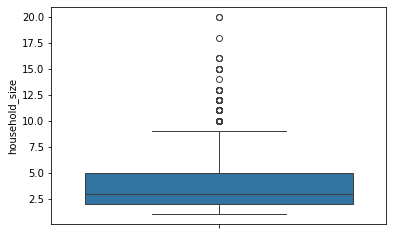

In [75]:
sns.boxplot(num["household_size"]);

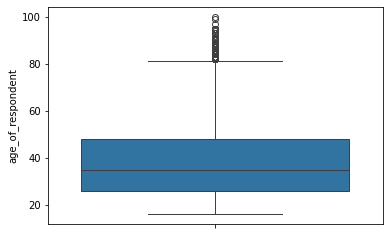

In [76]:
sns.boxplot(num["age_of_respondent"]);

In [77]:
print("Skewness of Numerical Variables:-\n",num.skew())

Skewness of Numerical Variables:-
 household_size       1.006388
age_of_respondent    0.862746
dtype: float64


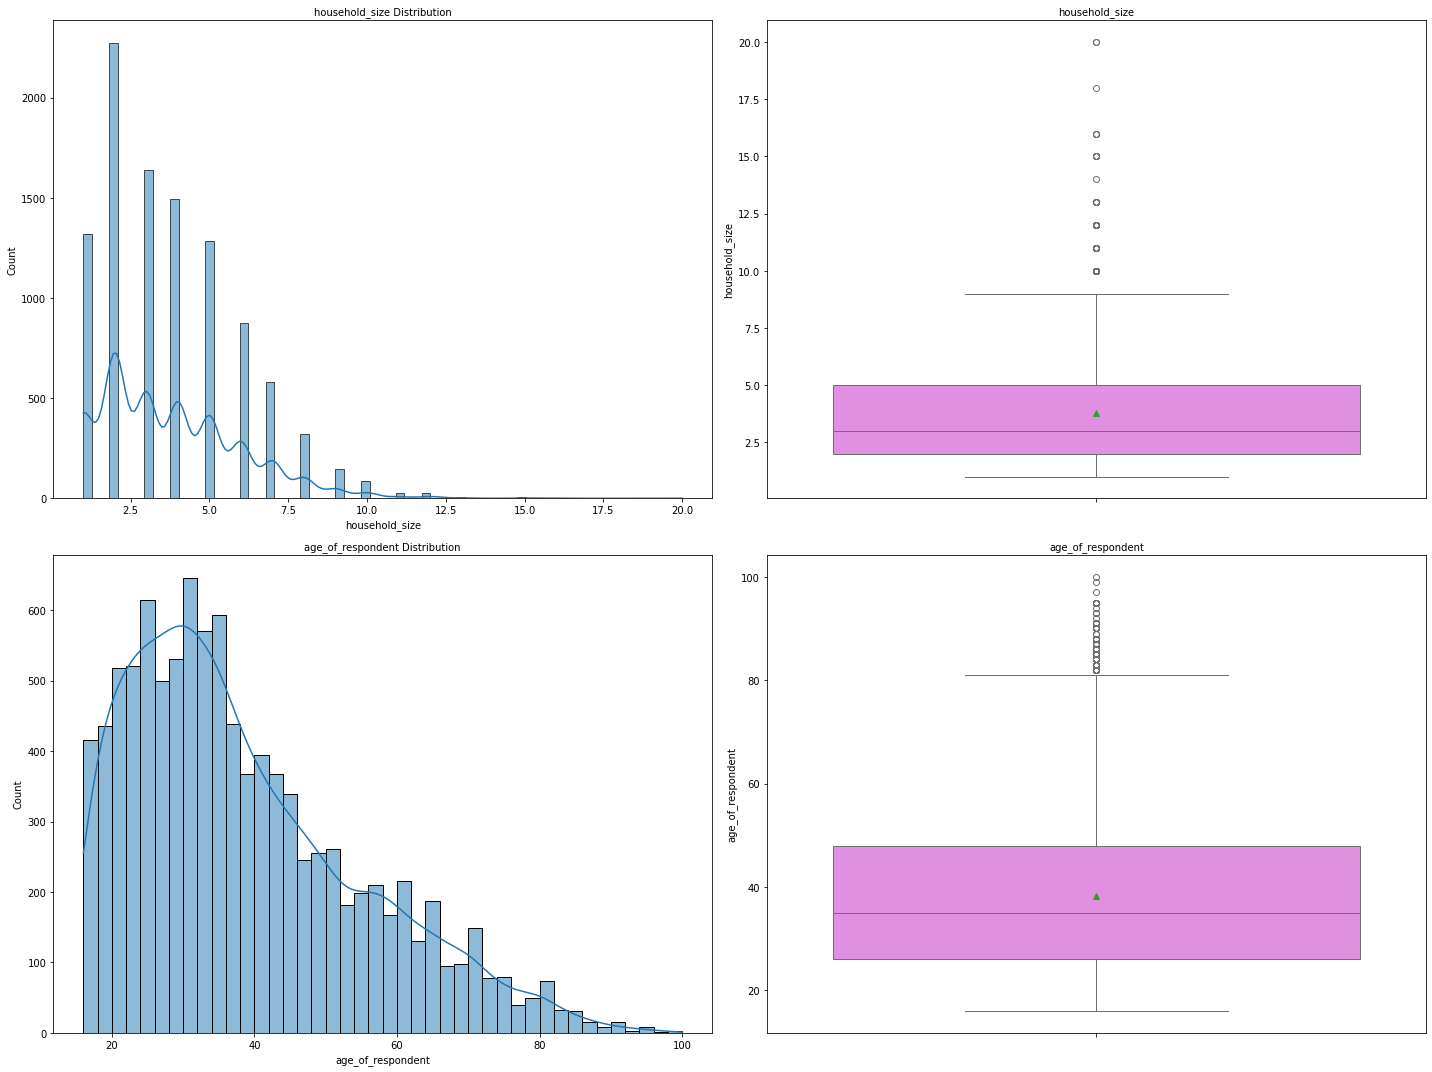

In [78]:
fig, axes= plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,15)

a = sns.histplot(num['household_size'],kde=True, ax=axes[0][0])
a.set_title("household_size Distribution", fontsize=10)

a= sns.boxplot(num["household_size"], orient="v", color="violet",showmeans=True, ax= axes[0][1])
a.set_title("household_size", fontsize=10)

a = sns.histplot(num["age_of_respondent"],kde=True, ax=axes[1][0])
a.set_title("age_of_respondent Distribution", fontsize=10)

a= sns.boxplot(num["age_of_respondent"], orient="v", color="violet",showmeans=True, ax= axes[1][1])
a.set_title("age_of_respondent", fontsize=10)
plt.tight_layout()
plt.show()

In [79]:
for i in num:
    Test[i] = (num[i])

In [80]:
for i in cat:
    Test[i] = (cat[i])

In [81]:
Test.describe(include = "all")

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,10086,10086,10086,10086,10086.000000,10086.000000,10086,10086,10086,10086,10086
unique,4,NaN,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,3745,NaN,6189,7559,NaN,NaN,5847,5487,4663,5479,2773
mean,NaN,2016-12-22 20:02:08.494943488,NaN,NaN,3.778802,38.308348,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016-01-01 00:00:00,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017-01-01 00:00:00,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018-01-01 00:00:00,NaN,NaN,5.000000,48.000000,NaN,NaN,NaN,NaN,NaN
max,NaN,2018-01-01 00:00:00,NaN,NaN,20.000000,100.000000,NaN,NaN,NaN,NaN,NaN


In [82]:
Test_new = Test.copy()

In [83]:
le_year=LabelEncoder()
le_country = LabelEncoder()
le_location_type =LabelEncoder()
le_cellphone_access =LabelEncoder()
le_gender_of_respondent =LabelEncoder()
le_relationship_with_head =LabelEncoder()
le_marital_status =LabelEncoder()
le_education_level =LabelEncoder()
le_job_type =LabelEncoder()

In [84]:
Test_new["year_n"]= le_year.fit_transform(Test_new["year"])
Test_new["country_n"]= le_country.fit_transform(Test_new["country"])
Test_new["location_type_n"]= le_location_type.fit_transform(Test_new["location_type"])
Test_new["cellphone_access_n"]= le_cellphone_access.fit_transform(Test_new["cellphone_access"])
Test_new["gender_of_respondent_n"]= le_gender_of_respondent.fit_transform(Test_new["gender_of_respondent"])
Test_new["relationship_with_head_n"]= le_relationship_with_head.fit_transform(Test_new["relationship_with_head"])
Test_new["marital_status_n"]= le_marital_status.fit_transform(Test_new["marital_status"])
Test_new["education_level_n"]= le_education_level.fit_transform(Test_new["education_level"])
Test_new["job_type_n"]= le_job_type.fit_transform(Test_new["job_type"])

In [85]:
Test_new.drop(cat.columns, axis = 1, inplace=True)
Test_new

,year,household_size,age_of_respondent,year_n,country_n,location_type_n,cellphone_access_n,gender_of_respondent_n,relationship_with_head_n,marital_status_n,education_level_n,job_type_n
0,2018-01-01,3,30,2,0,1,1,1,1,2,3,2
1,2018-01-01,7,51,2,0,1,1,1,1,2,5,3
2,2018-01-01,3,77,2,0,0,0,0,4,2,0,8
3,2018-01-01,6,39,2,0,0,0,0,1,2,2,8
4,2018-01-01,3,16,2,0,1,0,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018-01-01,2,62,2,3,0,0,0,5,2,2,9
10082,2018-01-01,8,42,2,3,1,1,1,1,2,2,9
10083,2018-01-01,1,39,2,3,1,1,1,1,3,3,7
10084,2018-01-01,6,28,2,3,0,1,0,5,2,2,9


In [86]:
Test_new.drop(["year"], axis=1,inplace=True)

In [87]:
# Copy all the predictor variables into X dataframe
X_Test = Test_new

In [88]:
X_Test

,household_size,age_of_respondent,year_n,country_n,location_type_n,cellphone_access_n,gender_of_respondent_n,relationship_with_head_n,marital_status_n,education_level_n,job_type_n
0,3,30,2,0,1,1,1,1,2,3,2
1,7,51,2,0,1,1,1,1,2,5,3
2,3,77,2,0,0,0,0,4,2,0,8
3,6,39,2,0,0,0,0,1,2,2,8
4,3,16,2,0,1,0,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...
10081,2,62,2,3,0,0,0,5,2,2,9
10082,8,42,2,3,1,1,1,1,2,2,9
10083,1,39,2,3,1,1,1,1,3,3,7
10084,6,28,2,3,0,1,0,5,2,2,9


In [89]:
TestData = scaler.fit_transform(X_Test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [90]:
TestData

array([[-0.35198335, -0.51067812,  1.20863498, ..., -0.39426106,
         0.81268847, -1.10388511],
       [ 1.45583541,  0.78010077,  1.20863498, ..., -0.39426106,
         2.48328377, -0.78165238],
       [-0.35198335,  2.37820797,  1.20863498, ..., -0.39426106,
        -1.69320449,  0.82951125],
       ...,
       [-1.25589273,  0.04251284,  1.20863498, ...,  0.61912249,
         0.81268847,  0.50727853],
       [ 1.00388072, -0.63360944,  1.20863498, ..., -0.39426106,
        -0.02260919,  1.15174398],
       [ 1.45583541, -1.37119738,  1.20863498, ...,  0.61912249,
         0.81268847,  0.50727853]])

In [93]:
Test

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018-01-01,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018-01-01,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018-01-01,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018-01-01,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018-01-01,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018-01-01,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018-01-01,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018-01-01,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018-01-01,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [94]:
Data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018-01-01,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018-01-01,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018-01-01,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018-01-01,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018-01-01,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018-01-01,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018-01-01,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018-01-01,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018-01-01,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10,100,200,500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
              ]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [97]:
final_clf = grid_search.best_estimator_

In [98]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [99]:
final_clf.score(X_test, y_test)

0.8833156216790649

In [100]:
predictions = final_clf.predict(TestData)

In [101]:
pd.DataFrame(predictions)

,0
0,1
1,1
2,0
3,0
4,0
...,...
10081,0
10082,0
10083,0
10084,0


In [102]:
final_submission = pd.DataFrame()
final_submission["unique_id"] = pd.DataFrame(Data["uniqueid"]+" x "+Data["country"])
final_submission["bank_account"] = predictions
final_submission

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [103]:
final_submission.drop("bank_account", axis=1, inplace=True)

In [104]:
final_submission.to_csv("ZindiFinancialPrediction.csv", index=False)

# Method 2 (Pipeline)

**Pipline helps in simplifying the process and preventation from repeating the steps for test dataset.**

In [105]:
df = pd.read_csv("train.csv")

In [106]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [107]:
df['year'] = pd.to_datetime(df['year'], format='%Y')+ pd.offsets.YearBegin(0)

In [108]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [109]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices  in split.split(df,  df[["year","bank_account","location_type", "cellphone_access", 
                                                          "gender_of_respondent", 
                                                         ]]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [110]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18819 entries, 5792 to 22315
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 18819 non-null  object        
 1   year                    18819 non-null  datetime64[ns]
 2   uniqueid                18819 non-null  object        
 3   bank_account            18819 non-null  object        
 4   location_type           18819 non-null  object        
 5   cellphone_access        18819 non-null  object        
 6   household_size          18819 non-null  int64         
 7   age_of_respondent       18819 non-null  int64         
 8   gender_of_respondent    18819 non-null  object        
 9   relationship_with_head  18819 non-null  object        
 10  marital_status          18819 non-null  object        
 11  education_level         18819 non-null  object        
 12  job_type                18819 non-null  object  

In [111]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 15269 to 7437
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 4705 non-null   object        
 1   year                    4705 non-null   datetime64[ns]
 2   uniqueid                4705 non-null   object        
 3   bank_account            4705 non-null   object        
 4   location_type           4705 non-null   object        
 5   cellphone_access        4705 non-null   object        
 6   household_size          4705 non-null   int64         
 7   age_of_respondent       4705 non-null   int64         
 8   gender_of_respondent    4705 non-null   object        
 9   relationship_with_head  4705 non-null   object        
 10  marital_status          4705 non-null   object        
 11  education_level         4705 non-null   object        
 12  job_type                4705 non-null   object   

In [112]:
(LabelEncoder().fit_transform(df["year"]))

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = LabelEncoder()
        X["country"] = encoder.fit_transform(X["country"])
        
        X["year"] = encoder.fit_transform(X["year"])
            
        X["location_type"] = encoder.fit_transform(X["location_type"])
        
        X["cellphone_access"] = encoder.fit_transform(X["cellphone_access"])
        
        X["gender_of_respondent"] = encoder.fit_transform(X["gender_of_respondent"])
            
        X["relationship_with_head"] = encoder.fit_transform(X["relationship_with_head"])
        
        X["marital_status"] = encoder.fit_transform(X["marital_status"])

        X["education_level"] = encoder.fit_transform(X["education_level"])
        
        X["job_type"] = encoder.fit_transform(X["job_type"])
              
        return X

In [114]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop([ 'uniqueid'], axis=1, errors="ignore")

In [115]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("featureencoder", FeatureEncoder()),
                      ("featuredropper", FeatureDropper())])

In [116]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [117]:
 strat_train_set["bank_account"] = LabelEncoder().fit_transform(strat_train_set["bank_account"])

In [118]:
strat_train_set

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
5792,0,2,0,0,1,4,23,0,1,2,2,9
18172,2,1,0,1,1,2,38,1,1,3,2,9
17908,2,1,0,1,0,1,75,0,1,4,0,6
17929,2,1,0,1,0,3,19,1,4,0,2,5
6183,1,0,0,0,1,3,25,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11627,1,0,1,0,1,5,43,0,5,2,3,9
7793,1,0,0,0,1,3,62,0,1,4,0,1
808,0,2,0,0,1,3,43,1,1,2,0,1
6577,1,0,0,0,1,2,45,0,1,0,2,5


In [119]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["bank_account"], axis=1)
y = strat_train_set["bank_account"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [121]:
clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10,100,200,500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
              ]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [122]:
final_clf = grid_search.best_estimator_

In [123]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200)

In [124]:
strat_test_set= pipeline.fit_transform(strat_test_set)

In [125]:
 strat_test_set["bank_account"] = LabelEncoder().fit_transform(strat_test_set["bank_account"])

In [126]:
X_test = strat_test_set.drop(["bank_account"], axis = 1)
y_test = strat_test_set["bank_account"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [127]:
final_clf.score(X_data_test, y_data_test)

0.8850159404888417

In [128]:
final_data = pipeline.fit_transform(df)

In [129]:
 final_data["bank_account"] = LabelEncoder().fit_transform(final_data["bank_account"])

In [130]:
X_final = final_data.drop(["bank_account"], axis=1)
y_final = final_data["bank_account"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [131]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split":[2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring = "accuracy", return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [132]:
prod_final_clf = grid_search.best_estimator_

In [133]:
prod_final_clf

RandomForestClassifier(max_depth=10)

In [134]:
prod_final_clf.score(X_data_final, y_data_final)

0.9025675905458256

In [135]:
test_data = pd.read_csv("test.csv")
final_test_data = test_data.copy()

In [136]:
final_test_data = pipeline.fit_transform(final_test_data)
final_test_data

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,1,3,30,1,1,2,3,2
1,0,2,1,1,7,51,1,1,2,5,3
2,0,2,0,0,3,77,0,4,2,0,8
3,0,2,0,0,6,39,0,1,2,2,8
4,0,2,1,0,3,16,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...
10081,3,2,0,0,2,62,0,5,2,2,9
10082,3,2,1,1,8,42,1,1,2,2,9
10083,3,2,1,1,1,39,1,1,3,3,7
10084,3,2,0,1,6,28,0,5,2,2,9


In [137]:
scaler = StandardScaler()
X_data_final_test =  scaler.fit_transform(final_test_data)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [138]:
predictions = prod_final_clf.predict(X_data_final_test)

In [139]:
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [140]:
final_df = pd.DataFrame()

In [141]:
final_df["uniqueid"] = (test_data["uniqueid"]+" x "+ test_data["country"])
final_df["bank_account"] = predictions

In [142]:
final_df

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [143]:
final_df.to_csv("Predictions.csv", index = False)

In [144]:
pd.read_csv("Predictions.csv")

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0
